In [ ]:
pip install keras-metrics

In [ ]:
pip install keras.applications

In [ ]:
import os
import os.path
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as test_df
import tensorflow as tf
import keras
import tensorflow.keras as keras
import keras_metrics
import keras_metrics as km
import matplotlib.pyplot as plt
import cv2
import glob
from os import listdir, makedirs
from os.path import isfile, join
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, InputLayer
from keras.layers import Flatten
import matplotlib.pyplot as plt
from keras.layers import Input,BatchNormalization

# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Pre- Processing 

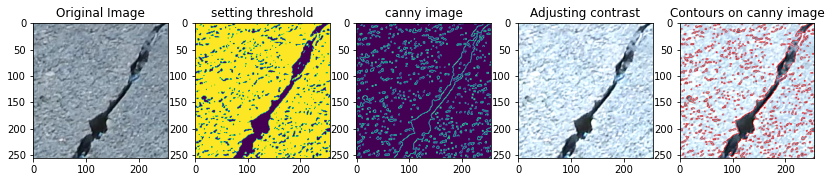

In [ ]:
def preprocessing_edge(img):
  import cv2
  from google.colab.patches import cv2_imshow

  
  image = cv2.imread(img)  # mandrill reference image from USC SIPI

  #denoise =cv2.blur(image,(10,10))

  alpha = 1.5 # Contrast control (1.0-3.0)
  beta = 0 # Brightness control (0-100)

  adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
  
  figure,axis = plt.subplots(nrows=1,ncols=5,figsize=(14,14))
  axis[0].imshow(image)
  axis[0].set_title('Original Image')
  axis[3].imshow(adjusted)
  axis[3].set_title('Adjusting contrast')

  Reading_Img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  _,Threshold_Img = cv2.threshold(Reading_Img,127,255,cv2.THRESH_BINARY)

  Canny_Img = cv2.Canny(Threshold_Img,90,150)
  contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  Draw_Contours = cv2.drawContours(adjusted,contours,-1,(255,0,0),1)
 
  axis[1].imshow(Threshold_Img)
  axis[1].set_title('setting threshold')
  axis[2].imshow(Canny_Img)
  axis[2].set_title('canny image')
  axis[4].imshow(Draw_Contours)
  axis[4].set_title('Contours on canny image')


preprocessing_edge('/content/drive/MyDrive/data/Pavements/Cracked/005-31.jpg')

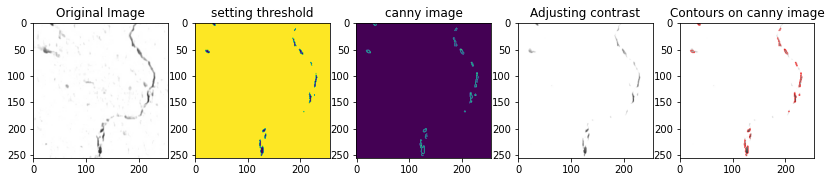

In [ ]:
preprocessing_edge('/content/drive/MyDrive/data/Decks/Cracked/7004-10.jpg')

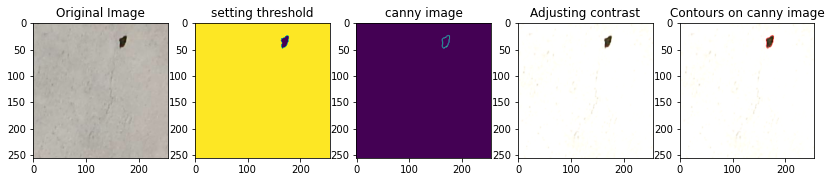

In [ ]:
preprocessing_edge('/content/drive/MyDrive/data/Walls/Cracked/7069-12.jpg')

***In walls we cant see much difference after pre-processing and cracks are much finer and hence, no pre-processing applied on the walls*** 

# Saving pre-processed images in a new folder

## Saving pavement images

### Saving cracked pavement images

#### Next 2 steps are commented as data has already been loaded in individual file. Uncomment it to run them 

In [ ]:
'''path = r'/content/drive/MyDrive/data/Pavements/Cracked' # Source 
dstpath = r'/content/drive/MyDrive/data/Pavements/transforming_crack/Cracked' # Destination 

# All files ending with .txt
files= glob.glob("/content/drive/MyDrive/data/Pavements/Cracked/*.jpg")

try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in BAW folder")


for img in files:
    try:
      image = cv2.imread(img)  # mandrill reference image from USC SIPI
      alpha = 1.5 # Contrast control (1.0-3.0)
      beta = 0 # Brightness control (0-100)

      adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

      figure,axis = plt.subplots(nrows=1,ncols=6,figsize=(14,14))
      axis[0].imshow(image)
      axis[0].set_title('Original Image')
      axis[1].imshow(adjusted)
      axis[1].set_title('Adjusting contrast')

      Reading_Img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
      _,Threshold_Img = cv2.threshold(Reading_Img,127,255,cv2.THRESH_BINARY)
      denoise = cv2.GaussianBlur(Threshold_Img,(5,5),0)

      Canny_Img = cv2.Canny(denoise,90,150)
      contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      Draw_Contours = cv2.drawContours(Reading_Img,contours,-1,(255,0,0),1)
      ## Writting transformed images into new folder
      dt=img.replace('Cracked','transforming_crack/Cracked')
      cv2.imwrite(dt,Draw_Contours)
      plt.clf()
    except:
      print ("{} is not converted".format(img))'''

'path = r\'/content/drive/MyDrive/data/Pavements/Cracked\' # Source \ndstpath = r\'/content/drive/MyDrive/data/Pavements/transforming_crack/Cracked\' # Destination \n\n# All files ending with .txt\nfiles= glob.glob("/content/drive/MyDrive/data/Pavements/Cracked/*.jpg")\n\ntry:\n    makedirs(dstpath)\nexcept:\n    print ("Directory already exist, images will be written in BAW folder")\n\n\nfor img in files:\n    try:\n      image = cv2.imread(img)  # mandrill reference image from USC SIPI\n      alpha = 1.5 # Contrast control (1.0-3.0)\n      beta = 0 # Brightness control (0-100)\n\n      adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)\n\n      figure,axis = plt.subplots(nrows=1,ncols=6,figsize=(14,14))\n      axis[0].imshow(image)\n      axis[0].set_title(\'Original Image\')\n      axis[1].imshow(adjusted)\n      axis[1].set_title(\'Adjusting contrast\')\n\n      Reading_Img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)\n      _,Threshold_Img = cv2.threshold(Reading_Img,127,25

### Saving Non-cracked pavement images

In [ ]:
'''path = r'/content/drive/MyDrive/data/Pavements/Non_cracked' # Source 
dstpath = r'/content/drive/MyDrive/data/Pavements/transforming_crack/Non_Cracked' # Destination 

# All files ending with .txt
files= glob.glob("/content/drive/MyDrive/data/Pavements/Non_cracked/*.jpg")
print(files)

n=0
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in BAW folder")

for img in files:
    try:
        image = cv2.imread(img)  # mandrill reference image from USC SIPI
        alpha = 1.5 # Contrast control (1.0-3.0)
        beta = 0 # Brightness control (0-100)

        adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

        Reading_Img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        _,Threshold_Img = cv2.threshold(Reading_Img,127,255,cv2.THRESH_BINARY)

        Canny_Img = cv2.Canny(Threshold_Img,90,150)
        contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        Draw_Contours = cv2.drawContours(adjusted,contours,-1,(255,0,0),1)
 

        dt=img.replace('Cracked','transforming_crack/Cracked')
        cv2.imwrite(dt,Draw_Contours)
        plt.clf()
    except:
        print ("{} is not converted".format(img))'''

'path = r\'/content/drive/MyDrive/data/Pavements/Non_cracked\' # Source \ndstpath = r\'/content/drive/MyDrive/data/Pavements/transforming_crack/Non_Cracked\' # Destination \n\n# All files ending with .txt\nfiles= glob.glob("/content/drive/MyDrive/data/Pavements/Non_cracked/*.jpg")\nprint(files)\n\nn=0\ntry:\n    makedirs(dstpath)\nexcept:\n    print ("Directory already exist, images will be written in BAW folder")\n\nfor img in files:\n    try:\n      image = cv2.imread(img)  # mandrill reference image from USC SIPI\n      alpha = 1.5 # Contrast control (1.0-3.0)\n      beta = 0 # Brightness control (0-100)\n\n      adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)\n\n      Reading_Img = cv2.cvtColor(adjusted,cv2.COLOR_BGR2GRAY)\n      _,Threshold_Img = cv2.threshold(Reading_Img,100,255,cv2.THRESH_BINARY_INV)\n  \n      denoise =cv2.blur(Threshold_Img,(10,10))\n      Canny_Img = cv2.Canny(denoise,90,150)\n      contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.C

## Saving decks pre-processed images

### Saving Decks Cracked images

#### Next 2 steps are commented as data has already been loaded in individual file. Uncomment it to run them 

In [ ]:
'''path = r'/content/drive/MyDrive/data/Decks/Cracked' # Source 
dstpath = r'/content/drive/MyDrive/data/Decks/transforming_crack/Cracked' # Destination 


# All files ending with .txt
files= glob.glob("/content/drive/MyDrive/data/Decks/Cracked/*.jpg")
print(files)
n=0
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in BAW folder")

for img in files:
    try:
        image = cv2.imread(img)  # mandrill reference image from USC SIPI
        alpha = 1.5 # Contrast control (1.0-3.0)
        beta = 0 # Brightness control (0-100)

        adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

        Reading_Img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        _,Threshold_Img = cv2.threshold(Reading_Img,127,255,cv2.THRESH_BINARY)

        Canny_Img = cv2.Canny(Threshold_Img,90,150)
        contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        Draw_Contours = cv2.drawContours(adjusted,contours,-1,(255,0,0),1)
 

        dt=img.replace('Cracked','transforming_crack/Cracked')
        cv2.imwrite(dt,Draw_Contours)
        plt.clf()
    except:
        print ("{} is not converted".format(img))'''

'path = r\'/content/drive/MyDrive/data/Decks/Cracked\' # Source \ndstpath = r\'/content/drive/MyDrive/data/Decks/transforming_crack/Cracked\' # Destination \n\n\n# All files ending with .txt\nfiles= glob.glob("/content/drive/MyDrive/data/Decks/Cracked/*.jpg")\nprint(files)\nn=0\ntry:\n    makedirs(dstpath)\nexcept:\n    print ("Directory already exist, images will be written in BAW folder")\n\nfor img in files:\n    try:\n      image = cv2.imread(img)  # mandrill reference image from USC SIPI\n      alpha = 1.5 # Contrast control (1.0-3.0)\n      beta = 0 # Brightness control (0-100)\n\n      adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)\n\n      Reading_Img = cv2.cvtColor(adjusted,cv2.COLOR_BGR2GRAY)\n      _,Threshold_Img = cv2.threshold(Reading_Img,100,255,cv2.THRESH_BINARY_INV)\n  \n      denoise =cv2.blur(Threshold_Img,(10,10))\n      Canny_Img = cv2.Canny(denoise,90,150)\n      contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)\n   

### Saving Decks Non-cracked images

In [ ]:
'''path = r'/content/drive/MyDrive/data/Decks/Non_cracked' # Source 
dstpath = r'/content/drive/MyDrive/data/Decks/transforming_crack/Non_Cracked' # Destination 


# All files ending with .txt
files= glob.glob("/content/drive/MyDrive/data/Decks/Non_cracked/*.jpg")
print(files)

n=0
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in BAW folder")

for img in files:
    try:
        image = cv2.imread(img)  # mandrill reference image from USC SIPI
        alpha = 1.5 # Contrast control (1.0-3.0)
        beta = 0 # Brightness control (0-100)

        adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

        Reading_Img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        _,Threshold_Img = cv2.threshold(Reading_Img,127,255,cv2.THRESH_BINARY)

        Canny_Img = cv2.Canny(Threshold_Img,90,150)
        contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        Draw_Contours = cv2.drawContours(adjusted,contours,-1,(255,0,0),1)
     

        dt=img.replace('Non_cracked','transforming_crack/Non_Cracked')
        cv2.imwrite(dt,Draw_Contours)
        plt.clf()
    except:
        print ("{} is not converted".format(img))'''

'path = r\'/content/drive/MyDrive/data/Decks/Non_cracked\' # Source \ndstpath = r\'/content/drive/MyDrive/data/Decks/transforming_crack/Non_Cracked\' # Destination \n\n\n# All files ending with .txt\nfiles= glob.glob("/content/drive/MyDrive/data/Decks/Non_cracked/*.jpg")\nprint(files)\n\nn=0\ntry:\n    makedirs(dstpath)\nexcept:\n    print ("Directory already exist, images will be written in BAW folder")\n\nfor img in files:\n    try:\n      image = cv2.imread(img)  # mandrill reference image from USC SIPI\n      alpha = 1.5 # Contrast control (1.0-3.0)\n      beta = 0 # Brightness control (0-100)\n\n      adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)\n\n      Reading_Img = cv2.cvtColor(adjusted,cv2.COLOR_BGR2GRAY)\n      _,Threshold_Img = cv2.threshold(Reading_Img,100,255,cv2.THRESH_BINARY_INV)\n  \n      denoise =cv2.blur(Threshold_Img,(10,10))\n      Canny_Img = cv2.Canny(denoise,90,150)\n      contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPRO

# Saving Decks, Pavement and Walls images in a dataframe

In [ ]:
Surface_Data = Path("/content/drive/MyDrive/data/Pavements/transforming_crack") 
Surface_JPG_Path = list(Surface_Data.glob(r"*/*.jpg"))
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Surface_JPG_Path))
Surface_JPG_Path_Series = pd.Series(Surface_JPG_Path,name="JPG").astype(str)
Surface_Labels_Series = pd.Series(Surface_Labels,name="CATEGORY")
Main_Surface_Data = pd.concat([Surface_JPG_Path_Series,Surface_Labels_Series],axis=1)
Main_Surface_Data = Main_Surface_Data.sample(frac=1).reset_index(drop=True)
Positive_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Cracked"]
Negative_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Non_Cracked"]
Negative_Surface = Negative_Surface.sample(n = 2608) ###Downsampling the images as data is imbalanced 
frames = [Negative_Surface, Positive_Surface]
df1 = pd.concat(frames)

In [ ]:
Positive_Surface.shape

(2608, 2)

In [ ]:
df1.shape

(5216, 2)

In [ ]:
Surface_Data = Path("/content/drive/MyDrive/data/Walls")
Surface_JPG_Path = list(Surface_Data.glob(r"*/*.jpg"))
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Surface_JPG_Path))
Surface_JPG_Path_Series = pd.Series(Surface_JPG_Path,name="JPG").astype(str)
Surface_Labels_Series = pd.Series(Surface_Labels,name="CATEGORY")
Main_Surface_Data = pd.concat([Surface_JPG_Path_Series,Surface_Labels_Series],axis=1)
Main_Surface_Data = Main_Surface_Data.sample(frac=1).reset_index(drop=True)
Positive_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Cracked"]
Negative_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Non_cracked"]
Negative_Surface['CATEGORY'].replace('Non_cracked','Non_Cracked',inplace=True)
Negative_Surface = Negative_Surface.sample(n = 3851)  ###Downsampling the images as data is imbalanced
frames = [Negative_Surface, Positive_Surface]
df2 = pd.concat(frames)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df2.shape

(7702, 2)

In [ ]:
Surface_Data = Path("/content/drive/MyDrive/data/Decks/transforming_crack")
Surface_JPG_Path = list(Surface_Data.glob(r"*/*.jpg"))
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Surface_JPG_Path))
Surface_JPG_Path_Series = pd.Series(Surface_JPG_Path,name="JPG").astype(str)
Surface_Labels_Series = pd.Series(Surface_Labels,name="CATEGORY")
Main_Surface_Data = pd.concat([Surface_JPG_Path_Series,Surface_Labels_Series],axis=1)
Main_Surface_Data = Main_Surface_Data.sample(frac=1).reset_index(drop=True)
Positive_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Cracked"]
Negative_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Non_Cracked"]
Negative_Surface = Negative_Surface.sample(n = 2025)  ###Downsampling the images as data is imbalanced
frames = [Negative_Surface, Positive_Surface]
df3 = pd.concat(frames)

In [ ]:
df3.shape

(4050, 2)

In [ ]:
frame = [df1, df2, df3]
df = pd.concat(frame)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.shape

(16968, 2)

In [ ]:
df

,JPG,CATEGORY
0,/content/drive/MyDrive/data/Walls/Cracked/7125...,Cracked
1,/content/drive/MyDrive/data/Pavements/transfor...,Non_Cracked
2,/content/drive/MyDrive/data/Pavements/transfor...,Non_Cracked
3,/content/drive/MyDrive/data/Walls/Cracked/7087...,Cracked
4,/content/drive/MyDrive/data/Pavements/transfor...,Cracked
...,...,...
16963,/content/drive/MyDrive/data/Decks/transforming...,Cracked
16964,/content/drive/MyDrive/data/Walls/Cracked/7119...,Cracked
16965,/content/drive/MyDrive/data/Decks/transforming...,Non_Cracked
16966,/content/drive/MyDrive/data/Decks/transforming...,Non_Cracked


In [ ]:
uniques = pd.unique(df['CATEGORY'].values.ravel())
pd.DataFrame(uniques)

,0
0,Cracked
1,Non_Cracked


# Seperating training, test and validation dataset

In [ ]:
train_df,test_df=train_test_split(df,test_size=0.2,shuffle=True,random_state=101)

train_gen=tf.keras.preprocessing.image.ImageDataGenerator(
                                    rescale=1./255,validation_split=0.2)

test_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

Train_Set=train_gen.flow_from_dataframe(train_df,                                         
                                        x_col="JPG",
                                        y_col="CATEGORY",target_size=(128,128),
                                        color_mode="rgb",class_mode="categorical",batch_size=32,shuffle=True,seed=42,subset="training")

Validation_Set=train_gen.flow_from_dataframe(train_df,x_col="JPG",
                                        y_col="CATEGORY",target_size=(128,128),
                                        color_mode="rgb",class_mode="categorical",batch_size=32,shuffle=True,seed=42,subset="validation")

Test_Set=test_gen.flow_from_dataframe(test_df,
                                      x_col="JPG",
                                        y_col="CATEGORY",target_size=(128,128),
                                        color_mode="rgb",class_mode="categorical",batch_size=32,shuffle=False,seed=42)

Found 10860 validated image filenames belonging to 2 classes.
Found 2714 validated image filenames belonging to 2 classes.
Found 3394 validated image filenames belonging to 2 classes.


# Plotting function

In [ ]:
def plot(hist,name,EPOCHS):
    num_epoch = [i for i in range(EPOCHS)]
    plt.figure(figsize=(20,15))
    plt.title("{} ".format(name))
    plt.subplot(231)
    plt.title("Accuracy")
    plt.plot(num_epoch,hist.history["accuracy"],label="train")
    plt.plot(num_epoch,hist.history["val_accuracy"],label="validation")
    plt.legend(loc="best")
    plt.subplot(232)
    plt.title("Loss")
    plt.plot(num_epoch,hist.history["loss"],label="train")
    plt.plot(num_epoch,hist.history["val_loss"],label="validation")
    plt.legend(loc="best")
    plt.subplot(233)
    plt.title("Recall")
    plt.plot(num_epoch,hist.history["recall"],label="train")
    plt.plot(num_epoch,hist.history["val_recall"],label="validation")
    plt.legend(loc="best")
    plt.subplot(234)
    plt.title("Precision")
    plt.plot(num_epoch,hist.history["precision"],label="train")
    plt.plot(num_epoch,hist.history["val_precision"],label="validation")
    plt.legend(loc="best")
    plt.subplot(235)
    plt.title("F1-Score")
    plt.plot(num_epoch,hist.history["f1_score"],label="train")
    plt.plot(num_epoch,hist.history["val_f1_score"],label="validation")
    plt.legend(loc="best")
    plt.show()

# Model training and evaluation 

## Xception Model

In [ ]:
xception = Xception(include_top=False, input_shape=(256, 256, 3))

x = xception.output
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(2, activation='softmax')(x)

model = Model(xception.input, output)

# Freezing all the Imported Layers
for layers in xception.layers:
    layers.trainable = False

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy",km.precision(), km.recall(),km.f1_score()])

In [ ]:
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_recall",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="/content/drive/MyDrive/data/log/xception/modelcheck")

In [ ]:
hist = model.fit(Train_Set, 
                 validation_data=Validation_Set, callbacks=[Checkpoint_Model],
                 steps_per_epoch=25, validation_steps=25, epochs=35)

Epoch 1/35


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


25/25 [==============================] - 200s 8s/step - loss: 0.5617 - accuracy: 0.7237 - precision: 0.6570 - recall: 0.6287 - f1_score: 0.6370 - val_loss: 0.4922 - val_accuracy: 0.7575 - val_precision: 0.7345 - val_recall: 0.7444 - val_f1_score: 0.7392
Epoch 2/35
25/25 [==============================] - 99s 4s/step - loss: 0.4184 - accuracy: 0.7975 - precision: 0.7369 - recall: 0.7748 - f1_score: 0.7553 - val_loss: 0.5010 - val_accuracy: 0.7812 - val_precision: 0.7400 - val_recall: 0.7932 - val_f1_score: 0.7656
Epoch 3/35
25/25 [==============================] - 97s 4s/step - loss: 0.4113 - accuracy: 0.8475 - precision: 0.7486 - recall: 0.8147 - f1_score: 0.7802 - val_loss: 0.3089 - val_accuracy: 0.8525 - val_precision: 0.7685 - val_recall: 0.8125 - val_f1_score: 0.7898
Epoch 4/35
25/25 [==============================] - 92s 4s/step - loss: 0.3961 - accuracy: 0.8037 - precision: 0.7775 - recall: 0.8157 - f1_score: 0.7961 - val_loss: 0.3508 - val_accuracy: 0.8425 - val_precision: 0.783

In [ ]:
model.save("Model_Last_Prediction.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


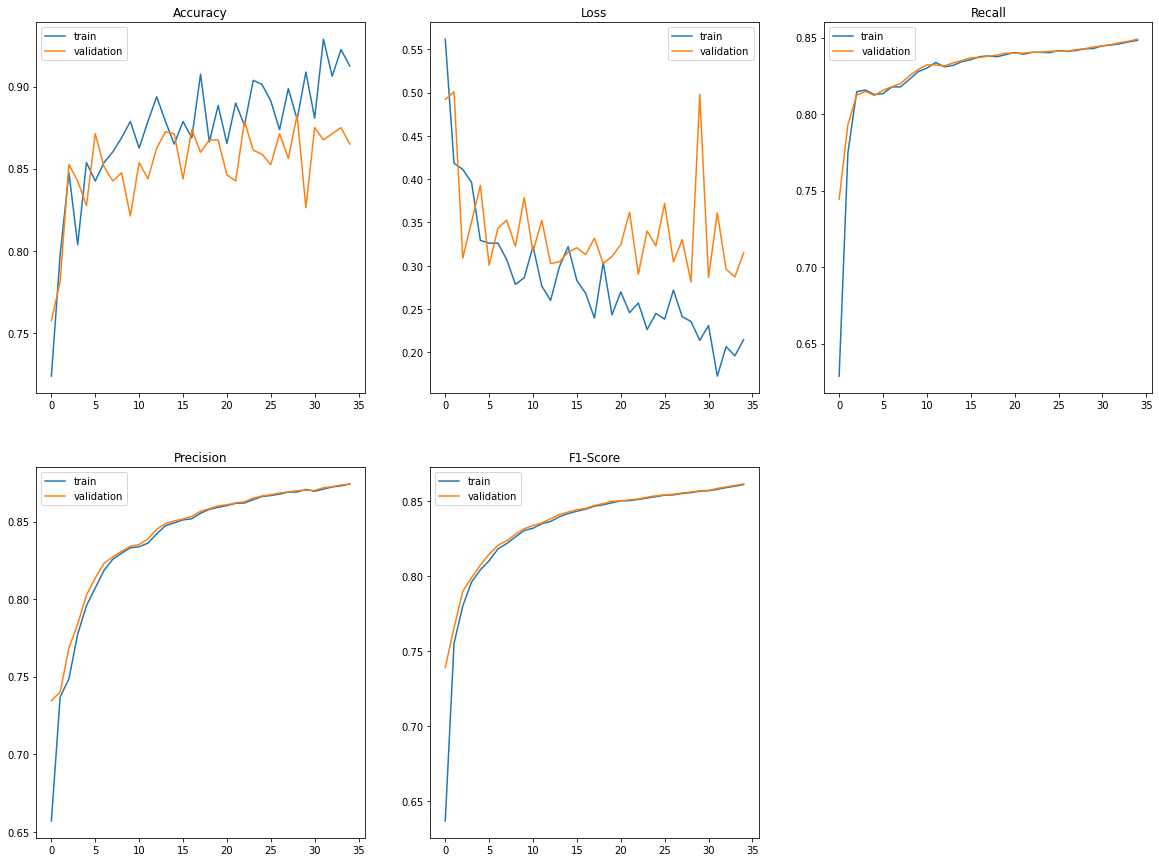

In [ ]:
plot(hist,"xception",35)

In [ ]:
model.save("Model_Last_Prediction.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
Model_Results = model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

107/107 [==============================] - 221s 2s/step - loss: 0.3461 - accuracy: 0.8480 - precision: 0.8721 - recall: 0.8508 - f1_score: 0.8613
LOSS:  0.3461
ACCURACY:  0.85


In [ ]:
Model_Test_Prediction = model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
print('Classification Report')
print(classification_report(Test_Set.classes, Model_Test_Prediction))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1690
           1       0.88      0.81      0.84      1704

    accuracy                           0.85      3394
   macro avg       0.85      0.85      0.85      3394
weighted avg       0.85      0.85      0.85      3394



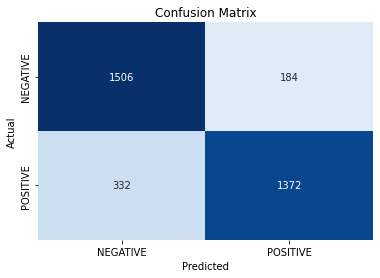

In [ ]:
cm=confusion_matrix(Test_Set.classes, Model_Test_Prediction)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Resnet50

In [ ]:
inputShape=(128,128,3)
model_res = ResNet50(include_top=False, weights="imagenet",input_shape =inputShape)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model_resnet = Sequential()
model_resnet.add(model_res)
model_resnet.add(Flatten())
model_resnet.add(BatchNormalization())
model_resnet.add(Dense(256, activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(BatchNormalization())
model_resnet.add(Dense(128, activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(BatchNormalization())
model_resnet.add(Dense(2, activation='softmax')) # [0.9,0.1]
model_resnet.layers[0].trainable = False

In [ ]:
# distribution
model_resnet.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy",km.precision(), km.recall(),km.f1_score()])
# train the network
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="val_recall",patience=4,mode="auto")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_recall",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="/content/drive/MyDrive/data/log/resnet/modelcheck")
hist_res = model_resnet.fit(Train_Set, 
                 validation_data=Validation_Set, callbacks=[Checkpoint_Model],
                 steps_per_epoch=25, validation_steps=25, epochs=35)

Epoch 1/35


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


25/25 [==============================] - 87s 3s/step - loss: 0.9176 - accuracy: 0.5325 - precision: 0.5896 - recall: 0.5244 - f1_score: 0.5545 - val_loss: 1.4380 - val_accuracy: 0.5000 - val_precision: 0.5174 - val_recall: 0.6676 - val_f1_score: 0.5813
Epoch 2/35
25/25 [==============================] - 80s 3s/step - loss: 0.8459 - accuracy: 0.5587 - precision: 0.5184 - recall: 0.7112 - f1_score: 0.5995 - val_loss: 1.2444 - val_accuracy: 0.5025 - val_precision: 0.5179 - val_recall: 0.7301 - val_f1_score: 0.6058
Epoch 3/35
25/25 [==============================] - 78s 3s/step - loss: 0.7698 - accuracy: 0.5763 - precision: 0.5219 - recall: 0.7409 - f1_score: 0.6123 - val_loss: 1.0654 - val_accuracy: 0.5025 - val_precision: 0.5257 - val_recall: 0.7445 - val_f1_score: 0.6162
Epoch 4/35
25/25 [==============================] - 78s 3s/step - loss: 0.7624 - accuracy: 0.6212 - precision: 0.5273 - recall: 0.7543 - f1_score: 0.6206 - val_loss: 0.8385 - val_accuracy: 0.5013 - val_precision: 0.5294

In [ ]:
model_resnet.save("Model_Last_Prediction.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
Model_Results = model_resnet.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

107/107 [==============================] - 162s 2s/step - loss: 0.5377 - accuracy: 0.6771 - precision: 0.6510 - recall: 0.5925 - f1_score: 0.6204
LOSS:  0.5377
ACCURACY:  0.68


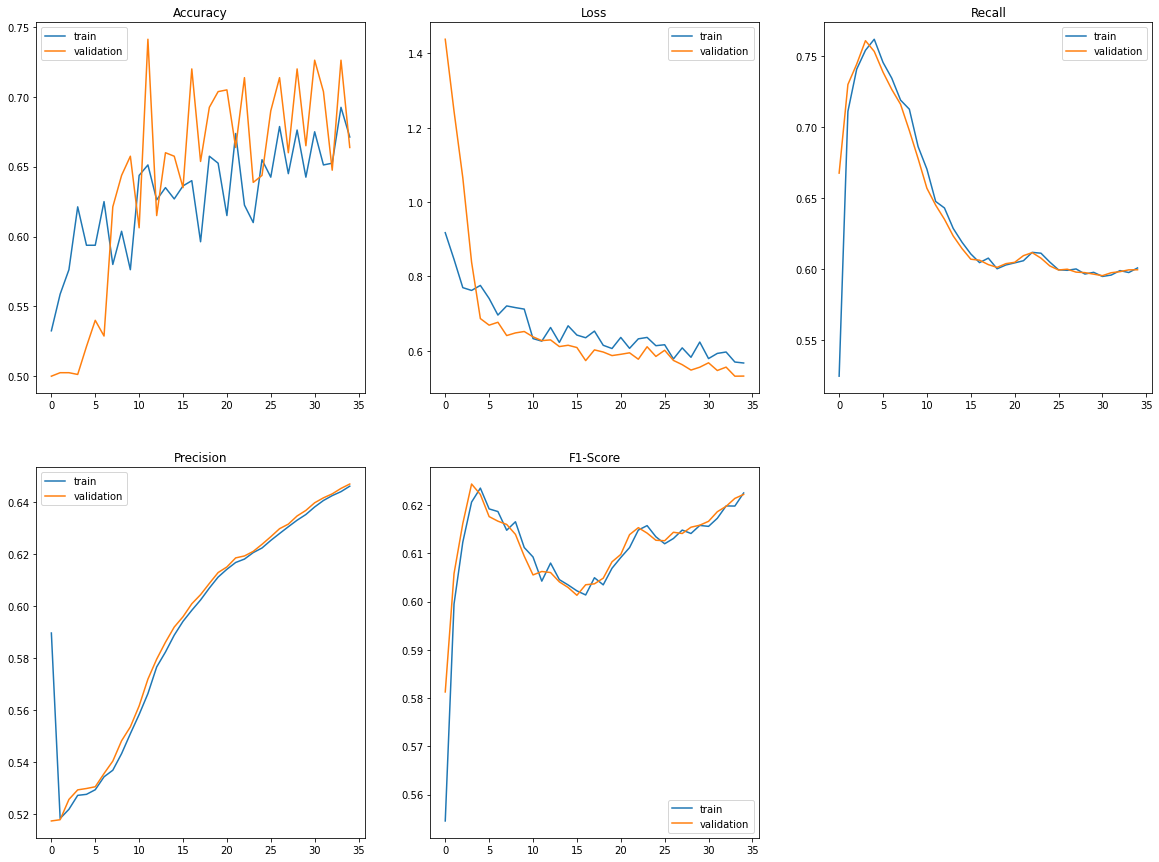

In [ ]:
plot(hist_res,"resnet50",35)

In [ ]:
Model_Test_Prediction = model_resnet.predict(Test_Set)
Model_Test_Prediction_res = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
print('Classification Report')
print(classification_report(Test_Set.classes, Model_Test_Prediction_res))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.41      0.56      1690
           1       0.62      0.94      0.75      1704

    accuracy                           0.68      3394
   macro avg       0.75      0.68      0.65      3394
weighted avg       0.74      0.68      0.65      3394



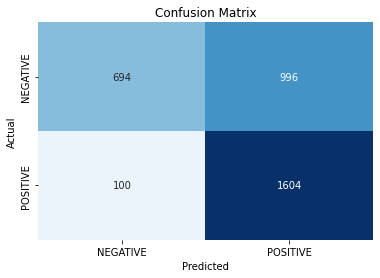

In [ ]:
cm=confusion_matrix(Test_Set.classes, Model_Test_Prediction_res)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## VGG19

In [ ]:
inputShape=(128,128,3)
model_19 = VGG19(include_top=False, weights="imagenet",input_shape =inputShape)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
model_vgg = Sequential()
model_vgg.add(model_19)
model_vgg.add(Flatten())
model_vgg.add(BatchNormalization())
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(BatchNormalization())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(BatchNormalization())
model_vgg.add(Dense(2, activation='softmax'))

model_vgg.layers[0].trainable = False

In [ ]:
# distribution
model_vgg.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy",km.precision(), km.recall(),km.f1_score()])
# train the network
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_recall",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="/content/drive/MyDrive/data/log/vgg19/modelcheck")


In [ ]:
hist_vgg19 = model_vgg.fit(Train_Set, 
                 validation_data=Validation_Set, callbacks=[Checkpoint_Model],
                 steps_per_epoch=25, validation_steps=25, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


25/25 [==============================] - 301s 12s/step - loss: 0.7154 - accuracy: 0.6712 - precision: 0.6421 - recall: 0.5907 - f1_score: 0.6153 - val_loss: 0.7722 - val_accuracy: 0.6275 - val_precision: 0.7144 - val_recall: 0.5213 - val_f1_score: 0.6012
Epoch 2/20
25/25 [==============================] - 297s 12s/step - loss: 0.6630 - accuracy: 0.7025 - precision: 0.7256 - recall: 0.5074 - f1_score: 0.5968 - val_loss: 0.5878 - val_accuracy: 0.6500 - val_precision: 0.7164 - val_recall: 0.5544 - val_f1_score: 0.6250
Epoch 3/20
25/25 [==============================] - 297s 12s/step - loss: 0.6392 - accuracy: 0.6950 - precision: 0.7000 - recall: 0.5748 - f1_score: 0.6312 - val_loss: 0.5714 - val_accuracy: 0.6687 - val_precision: 0.6950 - val_recall: 0.6001 - val_f1_score: 0.6440
Epoch 4/20
25/25 [==============================] - 297s 12s/step - loss: 0.5953 - accuracy: 0.7163 - precision: 0.6984 - recall: 0.6179 - f1_score: 0.6557 - val_loss: 0.5421 - val_accuracy: 0.7088 - val_precision

In [ ]:
model_vgg.save("Model_Last_Prediction.h5")

In [ ]:
Model_Results = model_vgg.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

107/107 [==============================] - 627s 6s/step - loss: 0.3862 - accuracy: 0.8179 - precision: 0.7930 - recall: 0.7075 - f1_score: 0.7478
LOSS:  0.3862
ACCURACY:  0.82


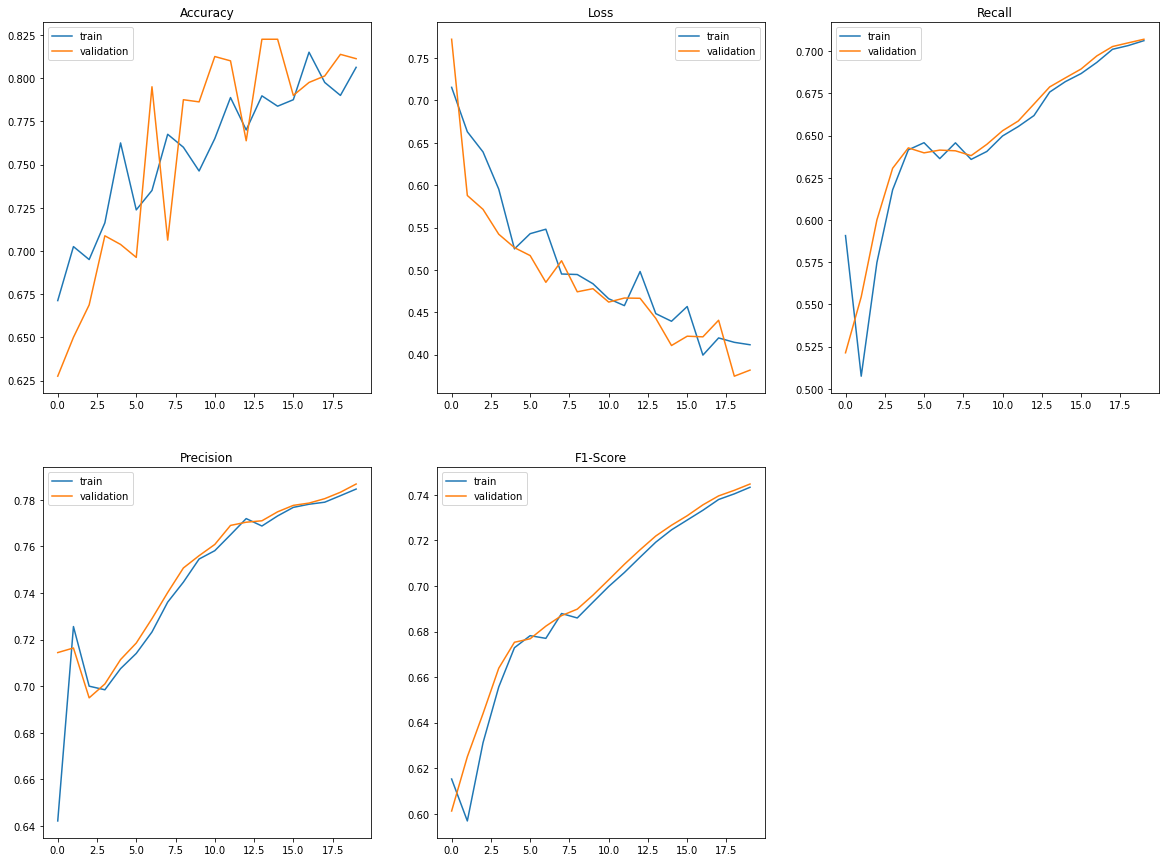

In [ ]:
plot(hist_vgg19,"VGG19",20)

In [ ]:
Model_Test_Prediction = model_vgg.predict(Test_Set)
Model_Test_Prediction_vgg = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
print('Classification Report')
print(classification_report(Test_Set.classes, Model_Test_Prediction_vgg))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1690
           1       0.76      0.93      0.84      1704

    accuracy                           0.82      3394
   macro avg       0.83      0.82      0.82      3394
weighted avg       0.83      0.82      0.82      3394



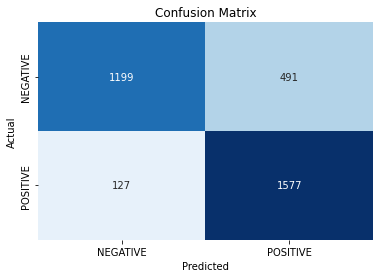

In [ ]:
cm=confusion_matrix(Test_Set.classes, Model_Test_Prediction_vgg)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Comparison of models

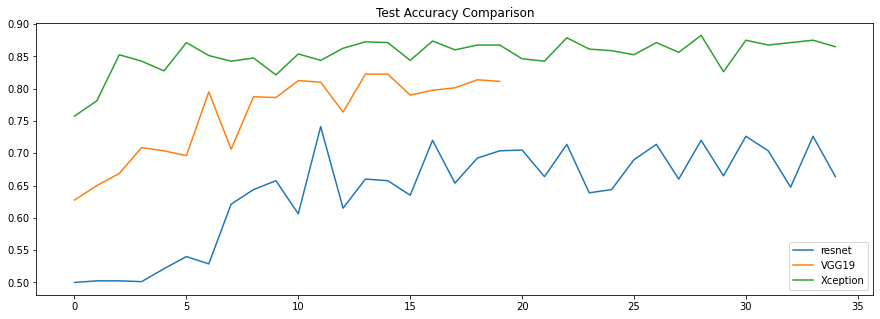

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Test Accuracy Comparison")
plt.plot(hist_res.history["val_accuracy"],label="resnet")
plt.plot(hist_vgg19.history["val_accuracy"],label="VGG19")
plt.plot(hist.history["val_accuracy"],label="Xception")
plt.legend()
plt.show()

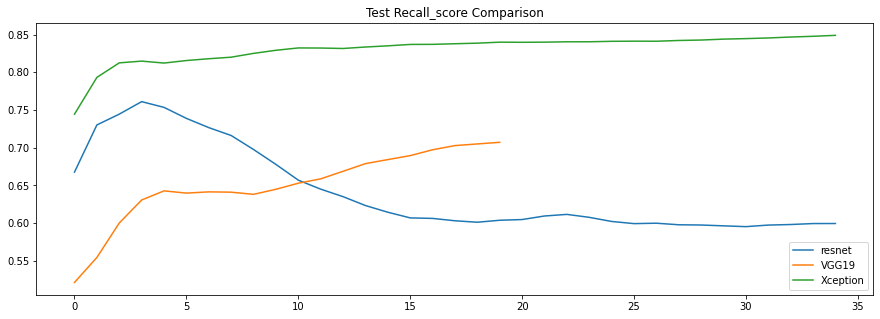

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Test Recall_score Comparison")
plt.plot(hist_res.history["val_recall"],label="resnet")
plt.plot(hist_vgg19.history["val_recall"],label="VGG19")
plt.plot(hist.history["val_recall"],label="Xception")
plt.legend()
plt.show()

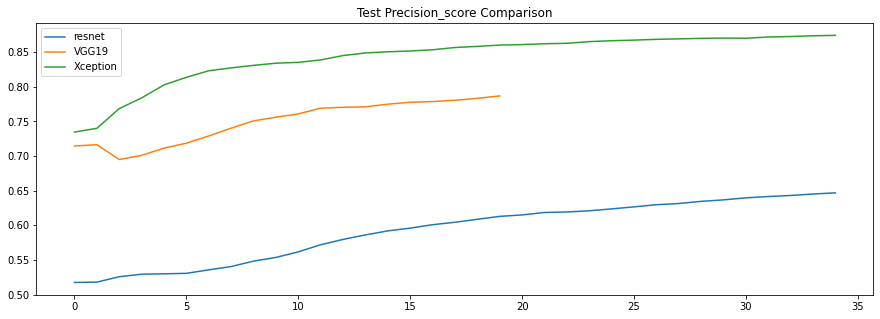

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Test Precision_score Comparison")
plt.plot(hist_res.history["val_precision"],label="resnet")
plt.plot(hist_vgg19.history["val_precision"],label="VGG19")
plt.plot(hist.history["val_precision"],label="Xception")
plt.legend()
plt.show()

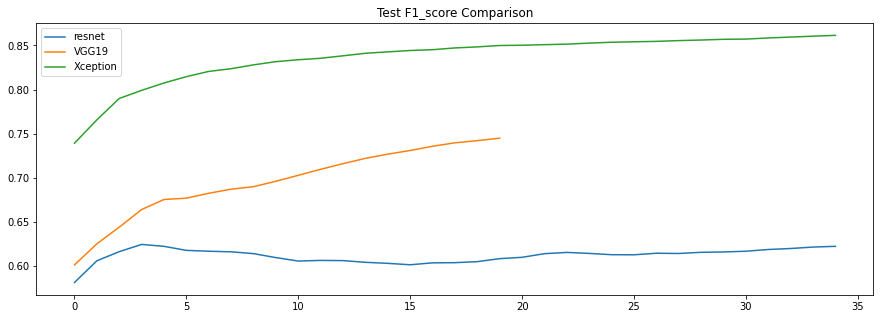

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Test F1_score Comparison")
plt.plot(hist_res.history["val_f1_score"],label="resnet")
plt.plot(hist_vgg19.history["val_f1_score"],label="VGG19")
plt.plot(hist.history["val_f1_score"],label="Xception")
plt.legend()
plt.show()

 **VGG19 and xception has amlost same accuracy. However, loss in xception is low and F1-score of the xception is more than the VGG19.  Xception outperformed VGG and  Resnet50.**